In [1]:
import six.moves.urllib.request as urlreq

import dash
import dash_bio as dashbio
import dash_html_components as html

from dash_bio_utils import pdb_parser as parser
import json
import tempfile

import copy
import pandas as pd

try:
    import mutagenesis_visualization as mut
except ModuleNotFoundError:  # This step is only for when I run the notebooks locally
    import sys
    sys.path.append('../../../')
    import mutagenesis_visualization as mut

# local modules
try:
    import mutagenesis_visualization.main.scripts.code_kwargs as code_kwargs
    import mutagenesis_visualization.main.scripts.code_utils as code_utils
except ModuleNotFoundError:
    import import_notebook
    import code_kwargs
    import code_utils

In [2]:
hras_RBD = mut.hras_RBD()

In [ ]:
pdb = '../../data/5p21.pdb'
dashboard_3d_protein(hras_RBD, pdb)

Dash is running on http://127.0.0.1:8060/

Dash is running on http://127.0.0.1:8060/

Dash is running on http://127.0.0.1:8060/

Dash is running on http://127.0.0.1:8060/

Dash is running on http://127.0.0.1:8060/

Dash is running on http://127.0.0.1:8060/

Dash is running on http://127.0.0.1:8060/

Dash is running on http://127.0.0.1:8060/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8060/ (Press CTRL+C to quit)
127.0.0.1 - - [29/Nov/2020 22:02:48] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2020 22:02:49] "GET /_dash-component-suites/dash_core_components/dash_core_components-shared.v1_13_0m1606700209.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2020 22:02:49] "GET /_dash-component-suites/dash_core_components/dash_core_components.v1_13_0m1606700209.min.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2020 22:02:49] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2020 22:02:49] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2020 22:02:49] "GET /_dash-component-suites/dash_core_components/async-graph.v1_13_0m1604001894.js HTTP/1.1" 200 -
127.0.0.1 - - [29/Nov/2020 22:02:49] "GET /_dash-component-suites/dash_core_components/async-plotlyjs.v1_13_0m1604001894.js HTTP/1.1" 200 -


In [30]:
def dashboard_3d_protein(
    self, pdb, mode='mean', position_correction=0, **kwargs
):
    '''
    Docstring
    '''

    # update kwargs
    temp_kwargs = copy.deepcopy(code_kwargs.kwargs())
    temp_kwargs.update(kwargs)

    # Load data from pdb file
    model_data = _parse_pdb(pdb)

    # Calculate styles based on enrichment scores
    styles_data = _parse_styles_data(
        model_data, self.dataframe.copy(), temp_kwargs['gof'],
        temp_kwargs['lof'], mode, position_correction
    )

    # Run dashhoard
    _run_dashboard_3d_protein(model_data, styles_data)


def _run_dashboard_3d_protein(model_data, styles_data):
    '''
    Create dashboard for main function.
    '''
    # Style sheet
    external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

    # Open app
    app = dash.Dash('__main__', external_stylesheets=external_stylesheets)

    # App layout
    app.layout = html.Div(
        id="app-container",
        children=[
            # Left column
            html.Div(
                id="left-column",
                className="six columns",
                children=[
                    dashbio.Molecule3dViewer(
                        id='my-dashbio-molecule3d',
                        modelData=model_data,
                        styles=styles_data,
                        selectionType='Chain'
                    )
                ]
            ),
            # Right column
            html.Div(
                dcc.Graph( # For plotly graphs I need to use dcc
                    id="right-column",
                    className="six columns",
                    figure=hras_RBD.rank_plotly(
                        return_plot_object=True, show=False
                    )
                )
            ),
        ]
    )

    # Run server
    app.run_server(port=8060, )

In [7]:
fig = hras_RBD.rank_plotly(return_plot_object=True, show=False)

In [24]:
import dash_core_components as dcc
import plotly.figure_factory as ff
bullet_data = pd.read_json(
    'https://cdn.rawgit.com/plotly/datasets/master/BulletData.json'
)

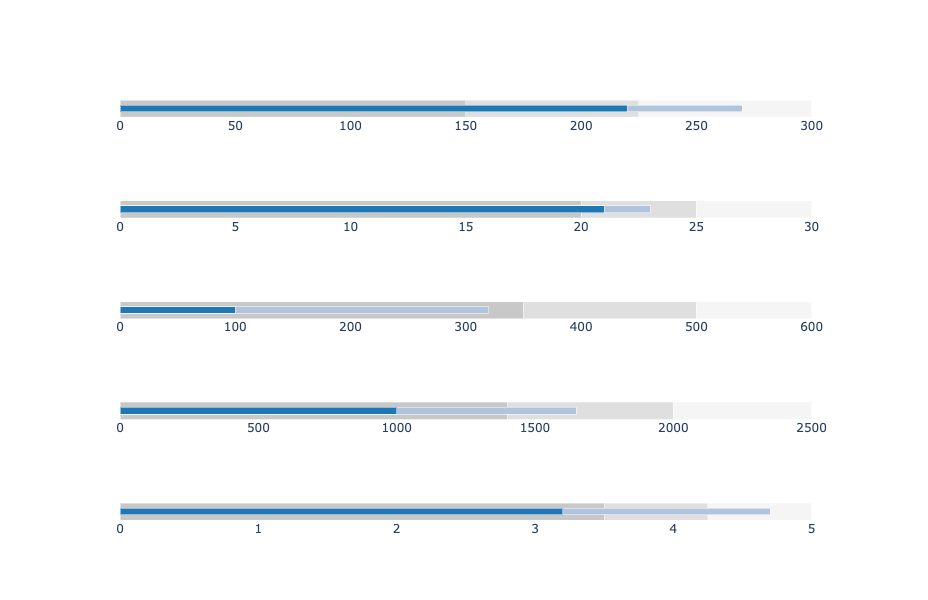

In [27]:
figure = ff.create_bullet(
    bullet_data,
    ranges='ranges',
    measures='measures',
    title=None,
    autosize=True,
)
figure

In [25]:
dcc.Graph(id='bullet_chart',
                      figure=ff.create_bullet(
                          bullet_data,
                          ranges='ranges',
                          measures='measures',
                          title=None,
                          autosize=True,
                      )

SyntaxError: unexpected EOF while parsing (<ipython-input-25-e43e11909c97>, line 8)

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.figure_factory as ff
import dash_bootstrap_components as dbc

bullet_data = pd.read_json(‘https://cdn.rawgit.com/plotly/datasets/master/BulletData.json 16’)

app = dash.Dash(name, external_stylesheets=[dbc.themes.BOOTSTRAP])

server = app.server

app.layout = html.Div(children=[
html.H1(children=‘Web App’),

html.Div([
    dbc.Row(
        dbc.Col(html.Div([
            dcc.Graph(id='bullet_chart',
                      figure=ff.create_bullet(
                          bullet_data,
                          ranges='ranges',
                          measures='measures',
                          title=None,
                          autosize=True,
                      )
                      ),
            ]), width={'size':3}  # this column is 3 units of the page width
        ),

        dbc.Col(html.Div([
            ]), width={'size':3}  # this column is 3 units of the page width
        ),
    ),
]),
])

if name == ‘main’:
app.run_server(debug=True)

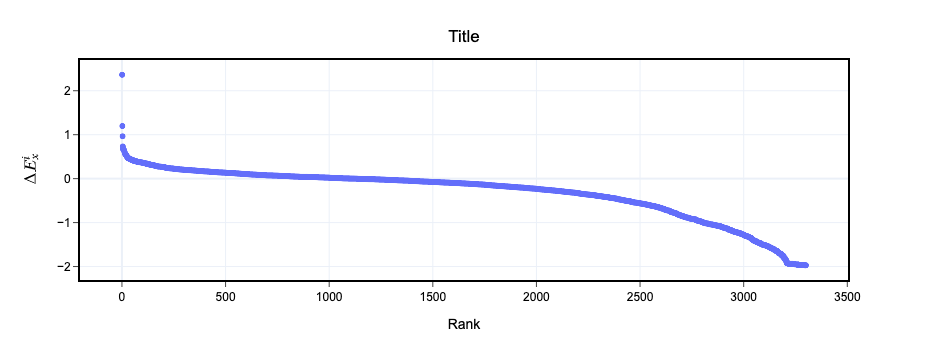

In [12]:
fig

In [4]:
def _parse_pdb(pdb):
    '''return the pdb in jason format'''
    # Parse pdb file
    modata = parser.create_data(pdb)

    # Put in jason format
    fmodel = files_data_style(modata)
    with open(fmodel) as fm:
        model_data = json.load(fm)

    return model_data


def _parse_styles_data(model_data, df, gof, lof, mode, position_correction):
    '''
    From a dataframe with enrichment scores, this function will return a jason file
    with the color of each atom.
    
    Returns
    -------
    styles_data : jason file
    '''

    # Create empty dict
    styles_data = {}

    # Calculate df with colors
    df_color = _add_color(
        hras_RBD.dataframe.copy(), 0.1, -0.3, 'A', position_correction=0
    )

    # Iterate over parsed pdb
    for item in model_data['atoms']:
        if item['chain'] != 'A':  # only color atoms from selected chain
            break
        try:
            style_atom = {
                'color': _assign_color_jason(df_color, item['residue_index']),
                'visualization_type': 'cartoon'
            }
            styles_data[str(item['serial'])] = style_atom
        except IndexError:  # in case we runt out of index
            pass
    return styles_data


def _assign_color_jason(df, residue):
    '''
    Give a color to the atom based on the enrichment score of that residue.
    As an input takes the dataframe that _add_color returns.
    '''
    return df.loc[df['Position_Corrected'] == residue, 'Color'].iloc[0]


def _add_color(df, gof, lof, mode, position_correction):
    '''You input the dataframe. Removes stop codons. 
    Returns the positions that are going to be colored blue,red and white'''

    # Correct position
    df['Position_Corrected'] = df['Position'] + position_correction

    # Add dummy color column
    red = '#FD3216'
    blue = '#6A76FC'
    green = '#16FF32'
    df['Color'] = green

    # Select grouping
    if mode == 'mean':
        df_grouped = df.groupby(['Position'], as_index=False).mean()
    else:
        df_grouped = df.loc[df['Aminoacid'] == mode]

    # Color of mutations
    df_grouped.loc[df_grouped['Score'] < lof, 'Color'] = blue
    df_grouped.loc[df_grouped['Score'] > gof, 'Color'] = red

    return df_grouped


def files_data_style(content):
    '''
    Function to create the modelData and style files for molecule visualization
    '''
    fdat = tempfile.NamedTemporaryFile(suffix=".js", delete=False, mode='w+')
    fdat.write(content)
    dataFile = fdat.name
    fdat.close()
    return dataFile